<a href="https://colab.research.google.com/github/MSaberian/PyLearnMachineLearning/blob/main/PyLearnMLTitanic/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data_train = pd.read_csv("train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [7]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train = data_train.fillna(0)
data_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,1.0


In [8]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch"]])
Y_train = np.array(data_train[["Survived"]])

## model

In [9]:
model = tf.keras.models.Sequential([
    Dense(5, activation="sigmoid"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(2, activation="softmax")
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.losses.sparse_categorical_crossentropy,
              # loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

In [11]:
# train
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 3ms/step - loss: 0.6673 - accuracy: 0.6162
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6031 - accuracy: 0.6599
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7318
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7811
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7946
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8092
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8092
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8137
Epoch 11/

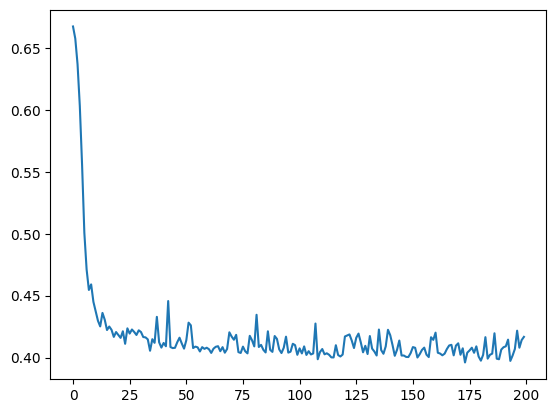

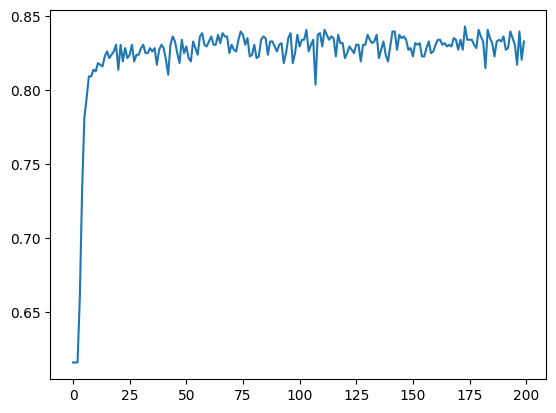

In [12]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [14]:
jack = np.array([[1, 1, 36, 0, 0]])

result = model.predict(jack)
np.argmax(result)

1/1 [==============================] - 0s 109ms/step


0

In [15]:
model.save("my_titanic.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model = tf.keras.models.load_model("my_titanic.h5")

In [17]:
jack = np.array([[1, 1, 36, 0, 0]])

result = model.predict(jack)
np.argmax(result)

1/1 [==============================] - 0s 70ms/step


0